In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import csv
from csv import reader

Loading the pre processed Abstract Dataset

In [25]:
data = pd.read_csv("/content/drive/My Drive/topic modelling dataset/abstract1.csv")
data.head()

,abstract
0,inflammatori diseas respiratori tract commonli...
1,surfact proteind spd particip innat respons in...
2,endothelin1 et1 21 amino acid peptid divers bi...
3,respiratori syncyti viru rsv pneumonia viru mi...
4,nidoviru subgenom mrna contain leader sequenc ...


In [26]:
len(data.axes[0])

85885

In [27]:
abstract = []
with open ("/content/drive/My Drive/topic modelling dataset/abstract1.csv",'r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    abstract.append(row)
print(len(abstract))

85886


In [28]:
print(abstract[:10])

[['abstract'], ['inflammatori diseas respiratori tract commonli associ elev product nitric oxid no• increas indic no• depend oxid stress although no• known antimicrobi antiinflammatori antioxid properti variou line evid support contribut no• lung injuri sever diseas model basi biochem evid often presum no• depend oxid due format oxid peroxynitrit although altern mechan involv phagocytederiv heme protein myeloperoxidas eosinophil peroxidas might oper condit inflamm overwhelm literatur no• gener activ respiratori tract would beyond scope commentari review area comprehens instead focus recent evid concept presum contribut no• inflammatori diseas lung'], ['surfact proteind spd particip innat respons inhal microorgan organ antigen contribut immun inflammatori regul within lung spd synthes secret alveolar bronchiolar epitheli cell also express epitheli cell line variou exocrin duct mucosa gastrointestin genitourinari tract spd collagen calciumdepend lectin collectin bind surfac glycoconjug e

In [29]:
abstract=abstract[1:]

In [30]:
import nltk
nltk.download("punkt")
nltk.download("popular")
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

In [31]:
abs_final=[]
for i in abstract:
  abs_final.append(i[0])

#Tokenization (final step in our cleaning of data) is performed using Regular Expression Tokeinzer from nltk package. 
tokenizer = RegexpTokenizer(r'\w+') #matches all word characters until a non word character like " " is found.
text=[]
for i in abs_final:
  #tokenize the document string
  tokens=tokenizer.tokenize(i)
  text.append(tokens)

In [32]:
#creating bag of words parameter
import gensim
from gensim import corpora,models

#Dictionary() function creates a term dictionary of our corpus, where every unique term is assigned an index and word count is also maintained.
dictionary = corpora.Dictionary(text)

# print(dictionary.token2id) can be used to see each unique id assigned to each unique word.

#Converts list of documents (corpus) into bag of words using dictionary prepared above. Output is a list of list of tuples with first tern the unique id and the second term the frequency.
doc_term_matrix = [dictionary.doc2bow(abst, allow_update=True) for abst in text]

**Number of Topics=4**

In [33]:
# lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=4, id2word=dictionary, passes=2, workers=2)
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))


**Number of Topics=5**

In [34]:
# lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=5, id2word=dictionary, passes=2, workers=2)
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))

**Number of Topics=6**

In [35]:
# lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=6, id2word=dictionary, passes=2, workers=2)
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))

**Number of Topics=7**

In [36]:
#This one gave much better results than the previous ones. 

# lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=7, id2word=dictionary, passes=2, workers=2)
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))


In [37]:
#Trying for number of passes=50 to get even better results.
# lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=7, id2word=dictionary, passes=50, workers=2)
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))

**Number of Topics=8**

In [38]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=8, id2word=dictionary, passes=13, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

Topic: 0 
Words: 0.039*"de" + 0.016*"la" + 0.013*"et" + 0.010*"le" + 0.010*"en" + 0.009*"ð" + 0.008*"al" + 0.008*"ñ" + 0.006*"â" + 0.006*"l"
Topic: 1 
Words: 0.018*"use" + 0.015*"model" + 0.008*"method" + 0.006*"data" + 0.006*"result" + 0.006*"test" + 0.005*"system" + 0.005*"predict" + 0.005*"develop" + 0.005*"base"
Topic: 2 
Words: 0.026*"patient" + 0.014*"surgeri" + 0.010*"group" + 0.009*"surgic" + 0.008*"laparoscop" + 0.008*"use" + 0.008*"procedur" + 0.008*"complic" + 0.008*"postop" + 0.008*"perform"
Topic: 3 
Words: 0.029*"covid19" + 0.028*"patient" + 0.018*"infect" + 0.017*"diseas" + 0.016*"sarscov2" + 0.015*"respiratori" + 0.015*"sever" + 0.012*"clinic" + 0.010*"coronaviru" + 0.010*"case"
Topic: 4 
Words: 0.017*"covid19" + 0.013*"health" + 0.009*"pandem" + 0.007*"care" + 0.006*"use" + 0.006*"case" + 0.006*"studi" + 0.006*"diseas" + 0.005*"public" + 0.005*"countri"
Topic: 5 
Words: 0.028*"patient" + 0.012*"studi" + 0.010*"p" + 0.009*"group" + 0.008*"95" + 0.008*"result" + 0.007*"o

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

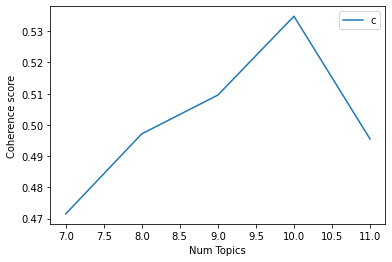

In [43]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=1, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=7, limit=12, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=12; start=7; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()